In [16]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

class diffusivity():
    def __init__(self):
        pass

    def parameters(self, temperature, fission_rate, oxygen_to_metal_ratio):
        
        # Material conditions

        self.temperature = temperature
        self.fission_rate = fission_rate
        self.x = oxygen_to_metal_ratio

        # Universal constants

        self.boltzmann_constant = 1.380651e-23
        self.boltzmann_constant_eV = 8.617e-5
        self.R = 8.314
        
    def xe_turnbull_diffusivity(self):

        # Ref: 

        D1 = 7.6e-10 * np.exp(-4.86e-19/self.temperature/self.boltzmann_constant)
        D2 = 4.0 * 1.41e-25 * np.sqrt(self.fission_rate) * np.exp(-1.91e-19 / (self.boltzmann_constant * self.temperature))
        D3 = 8e-40 * self.fission_rate * np.ones_like(self.temperature)

        return D1 + D2 + D3
                
    def xe_matthews_et_al(self):

        # Ref: 

        D1 = 2.22e-7 * np.exp(-3.26/(self.temperature*8.6e-5))/(1+29*np.exp(-1.84/(8.6e-5*self.temperature)))
        D2 = 2.82e-22 * np.sqrt(self.fission_rate) * np.exp(-2 / (8.6e-5 * self.temperature))
        D3 = 8.5e-40 * self.fission_rate * np.ones_like(self.temperature)

        return D1 + D2 + D3

    def xe_killeen_turnbull(self):

        self.D1 = 7.6e-10 * np.exp(-4.86e-19/self.temperature/self.boltzmann_constant)

        s = 3e-10 # atomic jump distance
        jv = 1e13 * np.exp(-27800/self.temperature) # s-1, vacancy jump rate
        alpha_s = (1e15) # m-2, fixed sink strength
        Z = 100 # number of sites around a point defect for recomination
        S = np.exp(-74100/self.temperature) # Schottky energy barrier
        G = np.exp(-35800/self.temperature) # Frenkel energy barrier
        K = 2e-4 # defect/atom s damage rate

        Vu = S * G**(-2)  * (0.5 * self.x**2 + G + 0.5 * np.sqrt(self.x**4 + 4 * G * self.x**2)) # oxidation-induced vacancy concentration
        Vi = (alpha_s * s**2 + Z * Vu) / (2 * Z) * ((1 + 4 * K * Z / (jv * (alpha_s * s**2 + Z * Vu)**2)**0.5) - 1) # irradiation-induced vacancy concentration

        # self.D2 = s**2 * jv * Vi

        self.D2 = 4.0 * 1.41e-25 * np.sqrt(self.fission_rate) * np.exp(-1.91e-19 / (self.boltzmann_constant * self.temperature))
        self.D3 = 8e-40 * self.fission_rate * np.ones_like(self.temperature)
        self.D4 = s**2 * jv * Vu

        self.D_tot = self.D1 + self.D2 + self.D3 + self.D4

    def xe_lewis_2007(self):

        self.D1 = 7.6e-10 * np.exp(-4.86e-19/self.temperature/self.boltzmann_constant)
        self.D2 = 4.0 * 1.41e-25 * np.sqrt(self.fission_rate) * np.exp(-1.91e-19 / (self.boltzmann_constant * self.temperature))
        self.D3 = 8e-40 * self.fission_rate * np.ones_like(self.temperature)
        self.D4 = self.x**2 * 2.22e-8 * np.exp(-20230 / self.temperature)

        self.D_tot = self.D1 + self.D2 + self.D3 + self.D4

    def vacancies_kogai1997(self):
        # D_v = D_gb (m2/s)

        self.D = 6.9e-4 * np.exp(-77000/(1.987 * self.temperature))
        return self.D

    def vacancies_white2004(self):
        self.D = 3.5/5 * 8.86e-6 * np.exp(-4.17e4 / (self.temperature))
        return self.D

    def vacancies_reynolds(self):
        self.D = 6.9e-4 * np.exp(-5.35e-19 / (self.temperature * self.boltzmann_constant))
        return self.D
    
    def diffusivity_murhpy(self):
        self.D_100 = 2e-5 * np.exp(-1.62 / (self.temperature * self.boltzmann_constant_eV))
        self.D_bulk = 3.35e-6 * np.exp(-3.64 / (self.temperature * self.boltzmann_constant_eV ))
        return self.D
    
    def xe_diffusivity_dislocations(self):
        self.D = 3e-8 * np.exp(-241000 / (self.temperature * 8.314))
    

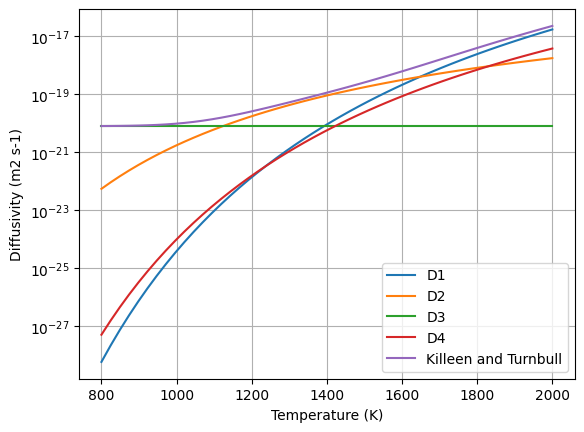

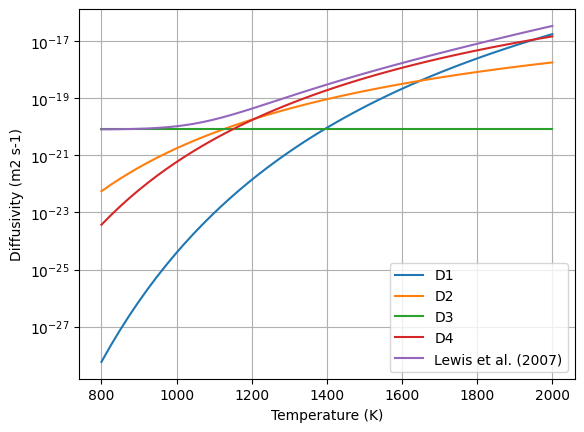

In [17]:
D = diffusivity()

temperature = np.linspace(800, 2000)

D.parameters(temperature, 1e19, 0.004)

D.xe_killeen_turnbull()

plt.plot(temperature, D.D1, label="D1")
plt.plot(temperature, D.D2, label="D2")
plt.plot(temperature, D.D3, label="D3")
plt.plot(temperature, D.D4, label="D4")
plt.plot(temperature, D.D_tot, label="Killeen and Turnbull")

plt.xlabel('Temperature (K)')
plt.ylabel('Diffusivity (m2 s-1)')
plt.legend()
plt.grid()
plt.yscale("log")
plt.show()

D.xe_lewis_2007()

plt.plot(temperature, D.D1, label="D1")
plt.plot(temperature, D.D2, label="D2")
plt.plot(temperature, D.D3, label="D3")
plt.plot(temperature, D.D4, label="D4")
plt.plot(temperature, D.D_tot, label="Lewis et al. (2007)")

plt.xlabel('Temperature (K)')
plt.ylabel('Diffusivity (m2 s-1)')
plt.legend()
plt.grid()
plt.yscale("log")
plt.show()




In [18]:
Vu = sym.Symbol("Vu")
S = sym.Symbol("S")
G = sym.Symbol("G")
x = sym.Symbol("x")
T = sym.Symbol("T")

Vu = S/G**2 * (1/2*x**2 + G + 1/2*(x**4+4*G*x**2)**0.5)
Vu

Du = sym.Symbol("Du")
Du = 1e-3 * sym.exp(-140 / 8.314 / T)
Du


0.001*exp(-16.8390666345923/T)

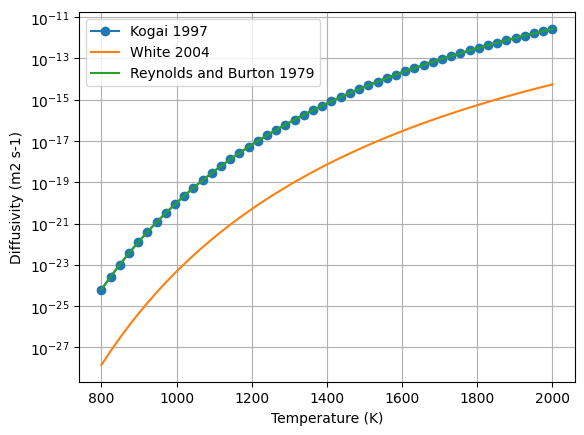

In [19]:
vacancy_diffusivity = diffusivity()

temperature = np.linspace(800, 2000)

D.parameters(temperature, 1e19, 0.004)

kogai = D.vacancies_kogai1997()
white = D.vacancies_white2004()
reynolds = D.vacancies_reynolds()

plt.plot(temperature, kogai, '-o')
plt.plot(temperature, white)
plt.plot(temperature, reynolds)

plt.xlabel('Temperature (K)')
plt.ylabel('Diffusivity (m2 s-1)')
plt.legend(['Kogai 1997', 'White 2004', 'Reynolds and Burton 1979'])
plt.grid()
plt.yscale("log")
plt.show()


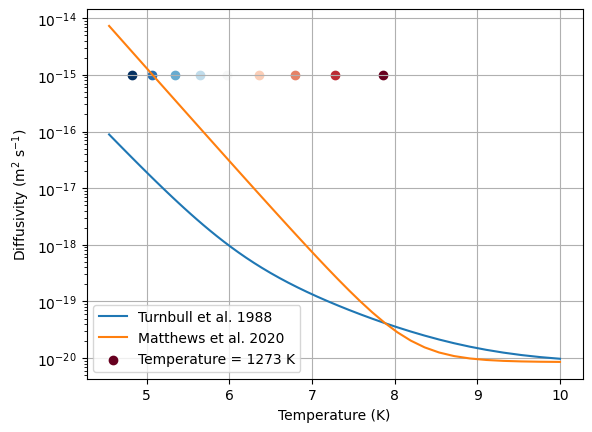

In [20]:
D = diffusivity()

temperature = np.linspace(1000, 2200)

D.parameters(temperature, 1e19, 0)

turnbull = D.xe_turnbull_diffusivity()
matthews = D.xe_matthews_et_al()

plt.plot(10000/temperature, turnbull)
plt.plot(10000/temperature, matthews)

temp_points = [1273, 1373, 1473, 1573, 1673, 1773, 1873, 1973, 2073]
temp_points_inverse = [10000 / temp for temp in temp_points]
colors = np.linspace(0, 1, len(temp_points))
for temp, color in zip(temp_points_inverse, colors):
    plt.scatter(temp, 1e-15, color=plt.cm.RdBu(color), label=f'Temperature = {int(10000 / temp)} K')

plt.xlabel('Temperature (K)')
plt.ylabel('Diffusivity (m${}^2$ s${}^{-1}$)')
plt.legend(['Turnbull et al. 1988', 'Matthews et al. 2020', 'Temperature = 1273 K'])
plt.grid()
plt.yscale("log")
plt.show()


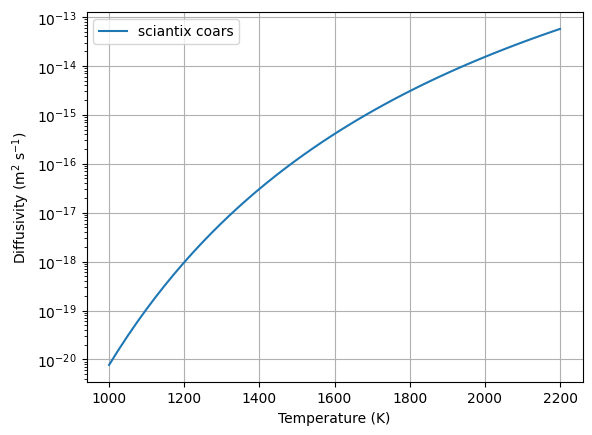

In [21]:
D = diffusivity()

temperature = np.linspace(1000, 2200)

D.parameters(temperature, 1e19, 0)

D.xe_diffusivity_dislocations()
sciantix_coarsening = D.D

D.diffusivity_murhpy()
murphy1 = D.D_100
murphy2 = D.D_bulk

plt.plot(temperature, sciantix_coarsening)

plt.xlabel('Temperature (K)')
plt.ylabel('Diffusivity (m${}^2$ s${}^{-1}$)')
plt.legend(['sciantix coars', 'm1', 'm2'])
plt.grid()
plt.yscale("log")
plt.show()
